In [489]:
from Features import *
from model import *
import torch
import torch.optim as optim
import matplotlib.pyplot as plt
%load_ext autoreload
%autoreload 2


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [490]:
path = 'English\\Fnt'
Dataset = LoadDataset.CustomDataSet("english.csv",path,LoadDataset.preprocessing_pipeline)

In [491]:
Dataset.get_num_classes()
Dataset.data

,image,label,encoded_labels
0,Sample001/img001-00001,0,[1]
1,Sample001/img001-00002,0,[1]
2,Sample001/img001-00003,0,[1]
3,Sample001/img001-00004,0,[1]
4,Sample001/img001-00005,0,[1]
...,...,...,...
62987,Sample062/img062-01012,z,[62]
62988,Sample062/img062-01013,z,[62]
62989,Sample062/img062-01014,z,[62]
62990,Sample062/img062-01015,z,[62]


In [492]:
train_ENG,val_ENG,Test_ENG = LoadDataset.load_split(Dataset,32)

torch.Size([32, 1, 64, 64])
torch.Size([32, 1])
torch.Size([32])


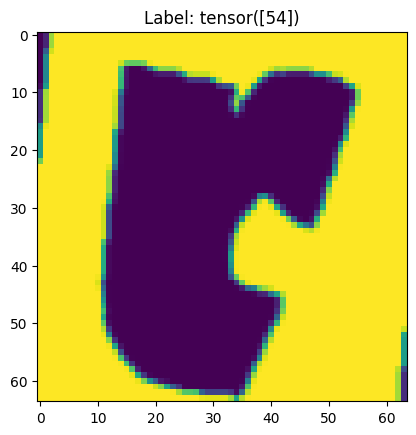

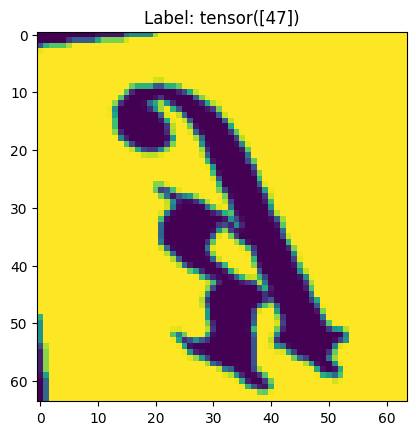

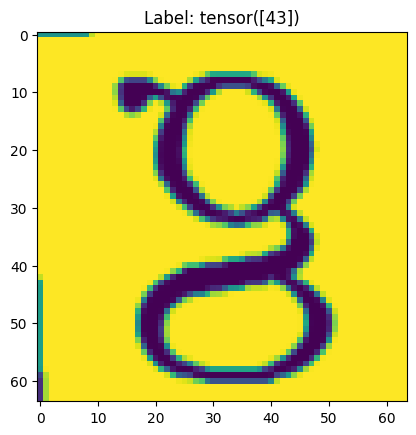

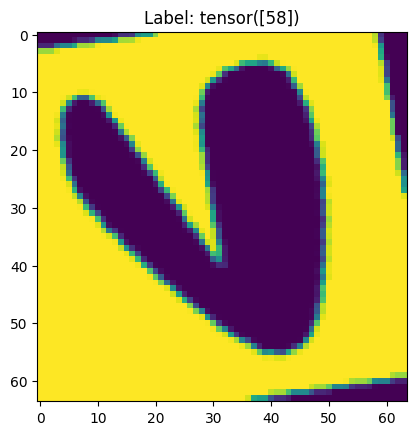

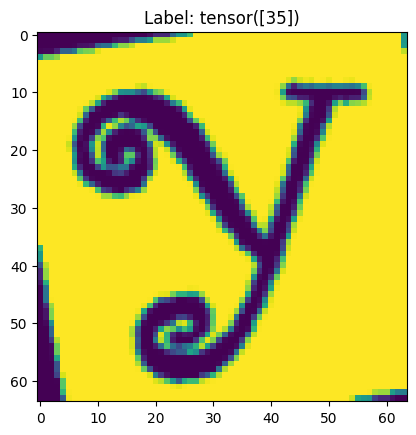

In [493]:
for batch in train_ENG:
    images, labels,length = batch
    print(images.shape)  # Print the shape of the batch of images
    print(labels.shape)  # Print the shape of the batch of labels
    print(length.shape)
    
    # Visualize the first few images and their labels
    for i in range(5):  # Change the range to visualize more or fewer images
        plt.imshow(images[i].permute(1, 2, 0))  # Assuming images are in (C, H, W) format
        plt.title(f'Label: {labels[i]}')
        plt.show()
    break

In [494]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print(f'Using device: {device}')

Using device: cuda


In [495]:
model = Model.OCRModel(Dataset.get_num_classes()+1).to(device)
criterion = Model.criterion(blank=0) 
num_epochs = 30

In [496]:
optimizer = optim.Adam(model.parameters(), lr=0.001)
# Learning rate scheduler
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer, mode='min', factor=0.1, patience=5, verbose=True)

e:\CODE\Image Processing\Image-Processing-Project-\env\lib\site-packages\torch\optim\lr_scheduler.py:62: UserWarning: The verbose parameter is deprecated. Please use get_last_lr() to access the learning rate.
  warnings.warn(


In [497]:
train_losses,val_losses = train_with_val.train_and_validate(model,criterion,optimizer,scheduler,train_ENG,val_ENG,num_epochs,device)

Epoch [1/30], Learning Rate: 0.001000
Epoch [1/30], Train Loss: 1.7046, Val Loss: 0.7924
Epoch [2/30], Learning Rate: 0.001000
Epoch [2/30], Train Loss: 0.7555, Val Loss: 0.6059
Epoch [3/30], Learning Rate: 0.001000
Epoch [3/30], Train Loss: 0.6402, Val Loss: 0.5659
Epoch [4/30], Learning Rate: 0.001000
Epoch [4/30], Train Loss: 0.5833, Val Loss: 0.5014
Epoch [5/30], Learning Rate: 0.001000
Epoch [5/30], Train Loss: 0.5482, Val Loss: 0.4939
Epoch [6/30], Learning Rate: 0.001000
Epoch [6/30], Train Loss: 0.5244, Val Loss: 0.4717
Epoch [7/30], Learning Rate: 0.001000
Epoch [7/30], Train Loss: 0.5050, Val Loss: 0.4427
Epoch [8/30], Learning Rate: 0.001000
Epoch [8/30], Train Loss: 0.4911, Val Loss: 0.4461
Epoch [9/30], Learning Rate: 0.001000
Epoch [9/30], Train Loss: 0.4750, Val Loss: 0.4359
Epoch [10/30], Learning Rate: 0.001000
Epoch [10/30], Train Loss: 0.4648, Val Loss: 0.4287
Epoch [11/30], Learning Rate: 0.001000
Epoch [11/30], Train Loss: 0.4533, Val Loss: 0.4167
Epoch [12/30], Le

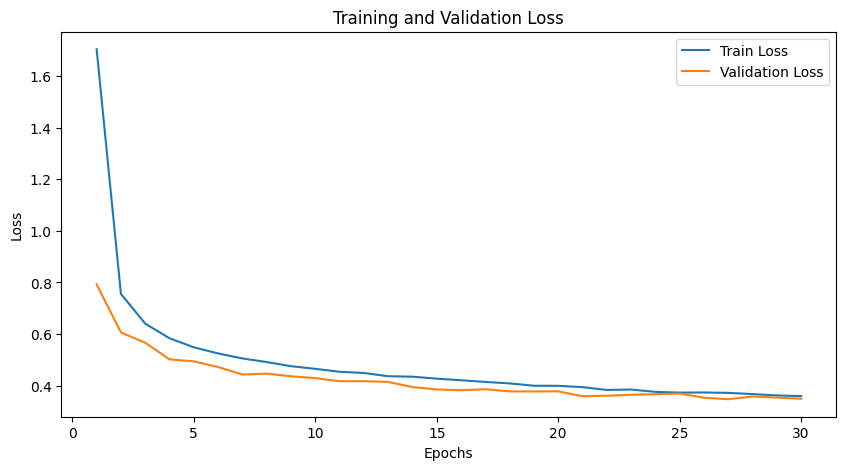

In [501]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, num_epochs + 1), train_losses, label='Train Loss')
plt.plot(range(1, num_epochs + 1), val_losses, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()


In [503]:
test.test(model,Test_ENG,criterion,device)

Test Loss: 0.3468
Sequence Accuracy: 85.95%
Character Accuracy: 85.95%


In [502]:
torch.save(model.state_dict(), 'ENGOCR.pth')
print('Model saved successfully.')

Model saved successfully.
